In [209]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/leaf-classification/train.csv.zip
/kaggle/input/leaf-classification/sample_submission.csv.zip
/kaggle/input/leaf-classification/images.zip
/kaggle/input/leaf-classification/test.csv.zip


## Data set details
The dataset consists approximately 1,584 images of leaf specimens (16 samples each of 99 species) which have been converted to binary black leaves against white backgrounds. Three sets of features are also provided per image: a shape contiguous descriptor, an interior texture histogram, and a ﬁne-scale margin histogram. For each feature, a 64-attribute vector is given per leaf sample.

Note that of the original 100 species, we have eliminated one on account of incomplete associated data in the original dataset.

# Data fields

id - an anonymous id unique to an image

margin_1, margin_2, margin_3, ..., margin_64 - each of the 64 attribute vectors for the margin feature

shape_1, shape_2, shape_3, ..., shape_64 - each of the 64 attribute vectors for the shape feature

texture_1, texture_2, texture_3, ..., texture_64 - each of the 64 attribute vectors for the texture feature

In [210]:
train_data = pd.read_csv('/kaggle/input/leaf-classification/train.csv.zip',index_col='id')
test_data = pd.read_csv('/kaggle/input/leaf-classification/test.csv.zip')

In [211]:
train_data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
id,,,,,,,,,,,,,,,,,,,,,
1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [212]:
test_data.head()

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


In [213]:
test_id=test_data.id
test_data = test_data.drop(['id'], axis =1)

In [214]:
test_data.head()

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.0,0.005859,0.023438,...,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.0,0.033203,0.023438,...,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.0,0.011719,0.005859,...,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.0,0.003906,0.001953,...,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.0,0.005859,0.000000,...,0.000000,0.042969,0.016602,0.010742,0.041016,0.0,0.0,0.007812,0.009766,0.007812


# VIsualizing leaf images'

In [179]:
import zipfile
with zipfile.ZipFile('/kaggle/input/leaf-classification/images.zip') as z_img:
    z_img.extractall()

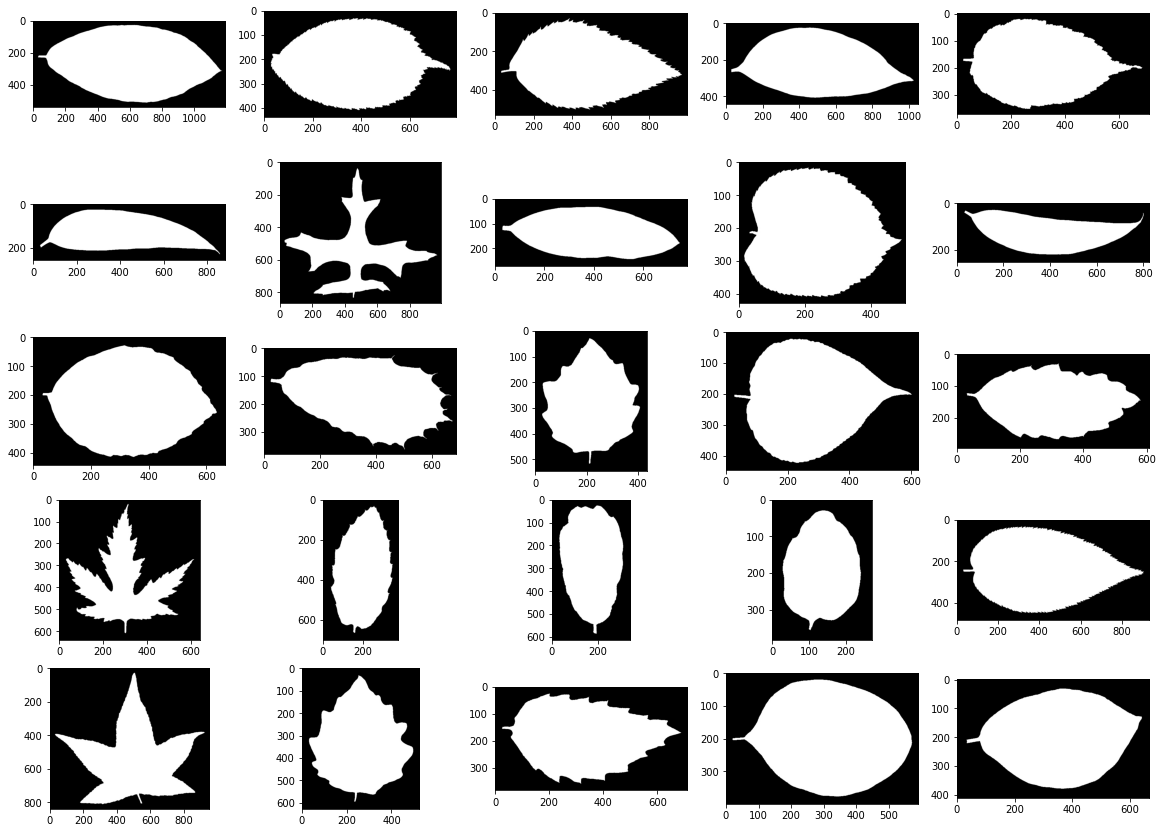

In [180]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('/kaggle/working/images',j))
    plt.imshow(img)

In [215]:
train_data.shape

(990, 193)

In [216]:
test_data.shape

(594, 192)

In [217]:
train_data.isnull().any().sum()

0

In [218]:
test_data.isnull().any().sum()

0

In [219]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 990 entries, 1 to 1584
Columns: 193 entries, species to texture64
dtypes: float64(192), object(1)
memory usage: 1.5+ MB


In [220]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


In [221]:
train_data['species'].nunique()

99

# Species is our categorical column which is our Target column

# Label Encoding

In [222]:
from sklearn.preprocessing import LabelEncoder

le=encoder.fit(train_data.species)
labels=le.transform(train_data.species)
classes=list(le.classes_)

In [223]:
classes

['Acer_Capillipes',
 'Acer_Circinatum',
 'Acer_Mono',
 'Acer_Opalus',
 'Acer_Palmatum',
 'Acer_Pictum',
 'Acer_Platanoids',
 'Acer_Rubrum',
 'Acer_Rufinerve',
 'Acer_Saccharinum',
 'Alnus_Cordata',
 'Alnus_Maximowiczii',
 'Alnus_Rubra',
 'Alnus_Sieboldiana',
 'Alnus_Viridis',
 'Arundinaria_Simonii',
 'Betula_Austrosinensis',
 'Betula_Pendula',
 'Callicarpa_Bodinieri',
 'Castanea_Sativa',
 'Celtis_Koraiensis',
 'Cercis_Siliquastrum',
 'Cornus_Chinensis',
 'Cornus_Controversa',
 'Cornus_Macrophylla',
 'Cotinus_Coggygria',
 'Crataegus_Monogyna',
 'Cytisus_Battandieri',
 'Eucalyptus_Glaucescens',
 'Eucalyptus_Neglecta',
 'Eucalyptus_Urnigera',
 'Fagus_Sylvatica',
 'Ginkgo_Biloba',
 'Ilex_Aquifolium',
 'Ilex_Cornuta',
 'Liquidambar_Styraciflua',
 'Liriodendron_Tulipifera',
 'Lithocarpus_Cleistocarpus',
 'Lithocarpus_Edulis',
 'Magnolia_Heptapeta',
 'Magnolia_Salicifolia',
 'Morus_Nigra',
 'Olea_Europaea',
 'Phildelphus',
 'Populus_Adenopoda',
 'Populus_Grandidentata',
 'Populus_Nigra',
 'Pr

In [190]:
labels

array([ 3, 49, 65, 94, 84, 40, 54, 78, 53, 89, 98, 16, 74, 50, 58, 31, 43,
        4, 75, 44, 83, 84, 13, 66, 15,  6, 73, 22, 73, 31, 36, 27, 94, 88,
       12, 28, 21, 25, 20, 60, 84, 65, 69, 58, 23, 76, 18, 52, 54,  9, 48,
       47, 64, 81, 83, 36, 58, 21, 81, 20, 62, 88, 34, 92, 79, 82, 20, 32,
        4, 84, 36, 35, 72, 60, 71, 72, 52, 50, 54, 11, 51, 18, 47,  5,  8,
       37, 97, 20, 33,  1, 59,  1, 56,  1,  9, 57, 20, 79, 29, 16, 32, 54,
       93, 10, 46, 59, 84, 76, 15, 10, 15,  0, 69,  4, 51, 51, 94, 36, 39,
       62,  2, 24, 26, 35, 25, 87,  0, 55, 34, 38,  1, 45,  7, 93, 56, 38,
       21, 51, 75, 81, 74, 33, 20, 37,  9, 40, 60, 31, 83, 50, 71, 67, 30,
       66,  1, 43, 61, 23, 65, 84, 87, 46, 57, 16,  2, 28, 12, 96, 44, 76,
       29, 75, 41, 87, 67, 61, 30,  5, 12, 62,  3, 83, 81,  6, 85,  4, 37,
       57, 84, 39, 71, 61,  6, 76, 14, 31, 98, 40, 17, 51, 16, 42, 63, 86,
       37, 69, 86, 71, 80, 78, 14, 35, 25,  5, 39,  8,  9, 26, 44, 60, 13,
       14, 77, 13, 80, 87

In [224]:
X=train_data.drop(['species'],axis=1).values
Y=labels

In [225]:
X

array([[0.007812, 0.023438, 0.023438, ..., 0.004883, 0.      , 0.025391],
       [0.005859, 0.      , 0.03125 , ..., 0.000977, 0.039062, 0.022461],
       [0.005859, 0.009766, 0.019531, ..., 0.      , 0.020508, 0.00293 ],
       ...,
       [0.001953, 0.003906, 0.      , ..., 0.027344, 0.      , 0.001953],
       [0.      , 0.      , 0.046875, ..., 0.      , 0.001953, 0.00293 ],
       [0.023438, 0.019531, 0.03125 , ..., 0.023438, 0.025391, 0.022461]])

## Splitting Data

In [226]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=1,shuffle=True,stratify=Y)

# Decision Tree Classifier

In [227]:
from sklearn.tree import DecisionTreeClassifier
classifier1=DecisionTreeClassifier(criterion='entropy')
classifier1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [228]:
classifier1.score(x_train,y_train)

1.0

In [229]:
classifier1.score(x_test,y_test)

0.5766129032258065

we can clearly see that decision tree is overfitted

# Random Forest Classifier

In [230]:
from sklearn.ensemble import RandomForestClassifier
classifier2=RandomForestClassifier(n_estimators = 40,n_jobs=4)
classifier2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=40, n_jobs=4)

In [231]:
classifier2.score(x_test,y_test)

0.9435483870967742

In [232]:
y_pred2=classifier2.predict_proba(x_test)


In [233]:
y_pred2

array([[0.   , 0.   , 0.   , ..., 0.025, 0.025, 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.45 , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.   , 0.025, ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.025, 0.   , ..., 0.   , 0.   , 0.   ]])

In [234]:
sample_data = pd.read_csv('/kaggle/input/leaf-classification/sample_submission.csv.zip',index_col='id')
sample_data.head()

,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
id,,,,,,,,,,,,,,,,,,,,,
4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
13,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101


In [235]:
final_pred=classifier2.predict_proba(test_data) # final prediction on test_data

In [236]:
final_pred

array([[0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.05 , ..., 0.   , 0.   , 0.   ],
       [0.   , 0.425, 0.025, ..., 0.   , 0.   , 0.   ],
       ...,
       [0.   , 0.025, 0.   , ..., 0.   , 0.   , 0.025],
       [0.025, 0.   , 0.025, ..., 0.075, 0.   , 0.   ],
       [0.025, 0.   , 0.   , ..., 0.025, 0.   , 0.025]])

In [237]:
submission = pd.DataFrame(final_pred, columns=classes)
submission.insert(0, 'id', test_id)
submission.reset_index()

,index,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,0,4,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000
1,1,7,0.000,0.000,0.050,0.000,0.000,0.025,0.000,0.000,...,0.000,0.025,0.000,0.0,0.000,0.000,0.025,0.000,0.0,0.000
2,2,9,0.000,0.425,0.025,0.000,0.025,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.000
3,3,12,0.000,0.025,0.000,0.025,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.075,0.075,0.000,0.0,0.025
4,4,13,0.000,0.025,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.025,0.0,0.000,0.000,0.025,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,589,1576,0.000,0.600,0.000,0.000,0.050,0.000,0.000,0.025,...,0.000,0.000,0.000,0.0,0.000,0.000,0.025,0.000,0.0,0.000
590,590,1577,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.075,...,0.000,0.000,0.000,0.0,0.025,0.000,0.025,0.000,0.0,0.025
591,591,1579,0.000,0.025,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.0,0.025
592,592,1580,0.025,0.000,0.025,0.000,0.050,0.000,0.025,0.000,...,0.025,0.025,0.000,0.0,0.000,0.000,0.000,0.075,0.0,0.000


In [238]:
submission.to_csv('submission.csv', index = False)